In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
arquivo = 'hospread.csv'

# Carregar o arquivo CSV em um DataFrame do Pandas
df = pd.read_csv(arquivo)

df['age'] = df['age'].str.replace(r'[\[\])]', '', regex=True)


df['age'] = df['age'].str.extract(r'(\d+)-').astype(int)




In [3]:
df_ordenado = df.sort_values(by='age', ascending=True).reset_index(drop=1)

df_ordenado

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,40,3,58,0,10,0,6,10,Missing,Musculoskeletal,Other,Diabetes,no,no,yes,yes,yes
1,40,3,47,1,10,2,2,0,Missing,Other,Circulatory,Other,no,no,no,yes,yes
2,40,3,67,1,10,0,1,0,InternalMedicine,Diabetes,Diabetes,Other,no,high,no,yes,yes
3,40,4,66,0,14,0,7,1,InternalMedicine,Circulatory,Circulatory,Respiratory,no,normal,yes,yes,yes
4,40,3,59,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,90,4,56,0,6,0,1,0,Missing,Other,Diabetes,Circulatory,no,no,no,yes,yes
24996,90,2,51,1,13,0,0,0,Missing,Other,Other,Respiratory,no,no,no,no,no
24997,90,1,22,0,3,0,1,1,Surgery,Diabetes,Other,Digestive,no,normal,no,no,yes
24998,90,10,44,0,27,1,1,0,Missing,Other,Other,Respiratory,no,no,yes,yes,no


In [4]:
bins = [40,50,60,70,80,90,100]
labels = ['40-50','50-60','60-70','70-80','80-90','90-100']

df_ordenado['age'] = pd.to_numeric(df_ordenado['age'], errors='coerce')

df_ordenado['age']= pd.cut(df_ordenado['age'], bins=bins, labels=labels, right=False)


df_ordenado

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,40-50,3,58,0,10,0,6,10,Missing,Musculoskeletal,Other,Diabetes,no,no,yes,yes,yes
1,40-50,3,47,1,10,2,2,0,Missing,Other,Circulatory,Other,no,no,no,yes,yes
2,40-50,3,67,1,10,0,1,0,InternalMedicine,Diabetes,Diabetes,Other,no,high,no,yes,yes
3,40-50,4,66,0,14,0,7,1,InternalMedicine,Circulatory,Circulatory,Respiratory,no,normal,yes,yes,yes
4,40-50,3,59,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,90-100,4,56,0,6,0,1,0,Missing,Other,Diabetes,Circulatory,no,no,no,yes,yes
24996,90-100,2,51,1,13,0,0,0,Missing,Other,Other,Respiratory,no,no,no,no,no
24997,90-100,1,22,0,3,0,1,1,Surgery,Diabetes,Other,Digestive,no,normal,no,no,yes
24998,90-100,10,44,0,27,1,1,0,Missing,Other,Other,Respiratory,no,no,yes,yes,no


In [5]:


num_40_50 = len(df_ordenado[df_ordenado['age'] == '40-50'])
num_40_50


2532

In [6]:
sum_40_50_selected = df_ordenado[df_ordenado['age'] == '40-50'][['time_in_hospital']].sum()
sum_40_50_selected
print('a média de dias de internamento de pacientes com idade entre 40-50 anos foi de', sum_40_50_selected/num_40_50)

a média de dias de internamento de pacientes com idade entre 40-50 anos foi de time_in_hospital    4.011453
dtype: float64


In [7]:
lista = []

x = '40-50' 
listaetaria = []
inicio, fim = x.split('-')

for i in range(6): 
    faixa_etaria = df_ordenado[df_ordenado['age'] == x]
    num = len(faixa_etaria)  
    
    if num > 0:  
        totaldias = faixa_etaria['time_in_hospital'].sum()  
        media = totaldias / num  # 
    else:
        media = 0 
    
    lista.append(media)  # Adiciona a média na lista
    listaetaria.append(x)

    inicio = int(inicio) + 10
    fim = int(fim) + 10
    x = f"{inicio}-{fim}"  

print(lista)  # Exibe a lista de médias para cada faixa etária
print(listaetaria)

[np.float64(4.0114533965244865), np.float64(4.154537286612758), np.float64(4.384407238288516), np.float64(4.599093169518794), np.float64(4.813773250664305), np.float64(4.762666666666667)]
['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


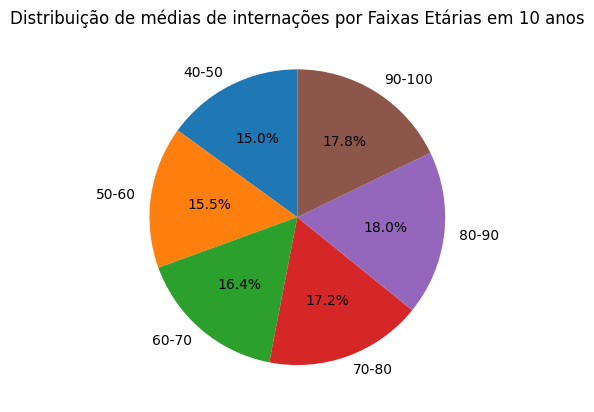

In [8]:
plt.pie(lista, labels=listaetaria, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de médias de internações por Faixas Etárias em 10 anos')
plt.show()


In [9]:
lista = []

x = '40-50' 
listaetaria = []
inicio, fim = x.split('-')

for i in range(6): 
    faixa_etaria = df_ordenado[df_ordenado['age'] == x]
    num = len(faixa_etaria)  
    
    if num > 0:  
        totalproc = faixa_etaria['n_lab_procedures'].sum()  
        media = totalproc / num  # 
    else:
        media = 0 
    
    lista.append(media)  # Adiciona a média na lista
    listaetaria.append(x)

    inicio = int(inicio) + 10
    fim = int(fim) + 10
    x = f"{inicio}-{fim}"  

print(lista)  # Exibe a lista de médias para cada faixa etária
print(listaetaria)

[np.float64(42.95537124802528), np.float64(42.489667565139264), np.float64(42.597158802638255), np.float64(43.57920140412462), np.float64(44.349645704162974), np.float64(43.974666666666664)]
['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


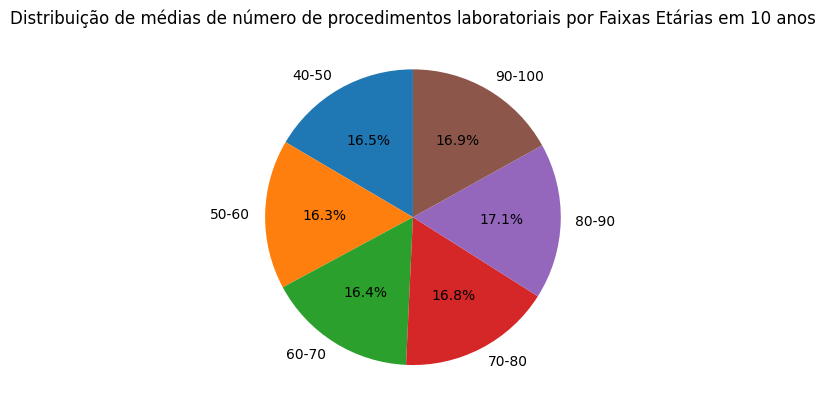

In [10]:
plt.pie(lista, labels=listaetaria, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de médias de número de procedimentos laboratoriais por Faixas Etárias em 10 anos')
plt.show()


In [11]:
num_40_50_dm2 = len(df_ordenado[(df_ordenado['age'] == '40-50') & (df_ordenado['diabetes_med'] == 'yes')])

total_dm2=len(df_ordenado[df_ordenado['diabetes_med']=='yes'])
total_dm2

19228

In [12]:
lista = []

x = '40-50' 
listaetaria = []
inicio, fim = x.split('-')

for i in range(6): 
    return_dm2 = df_ordenado[(df_ordenado['age'] == x) & (df_ordenado['diabetes_med'] == 'yes')]
    num = len(return_dm2)  

    
    lista.append(num)  # Adiciona a média na lista
    listaetaria.append(x)

    inicio = int(inicio) + 10
    fim = int(fim) + 10
    x = f"{inicio}-{fim}"  

print(lista)  # Exibe a lista de médias para cada faixa etária
print(listaetaria)

[1936, 3494, 4632, 5237, 3398, 531]
['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


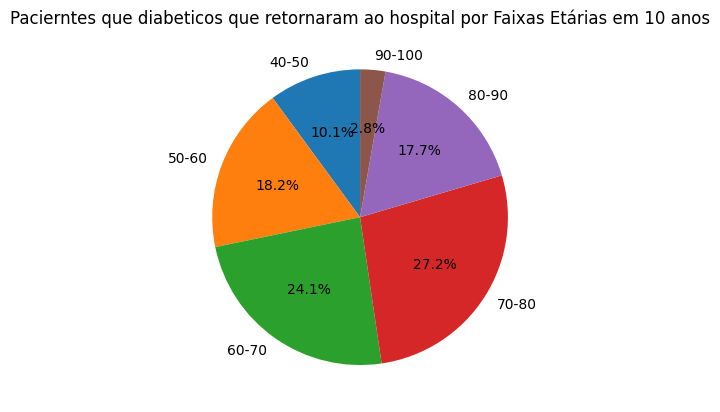

In [13]:
plt.pie(lista, labels=listaetaria, autopct='%1.1f%%', startangle=90)
plt.title('Pacierntes que diabeticos que retornaram ao hospital por Faixas Etárias em 10 anos')
plt.show()

In [14]:
df_ordenado['glucose_test'] = df_ordenado['glucose_test'].str.strip().str.lower()
num_glucose_no = len(df_ordenado[df_ordenado['glucose_test']== 'no'])

num_glucose_yes = len(df_ordenado[df_ordenado['glucose_test']!= 'no'])
num_glucose_no,num_glucose_yes





(23625, 1375)

In [15]:
lista = []

x = '40-50' 
listaetaria = []
inicio, fim = x.split('-')

for i in range(6): 
    tot_gluc_tes = df_ordenado[(df_ordenado['age'] == x) & (df_ordenado['glucose_test'] != 'no')]
    num = len(tot_gluc_tes)  

    
    lista.append(num)  # Adiciona a média na lista
    listaetaria.append(x)

    inicio = int(inicio) + 10
    fim = int(fim) + 10
    x = f"{inicio}-{fim}"  

print(lista)  # Exibe a lista de médias para cada faixa etária
print(sum(lista))
print(listaetaria)

[141, 188, 270, 395, 315, 66]
1375
['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


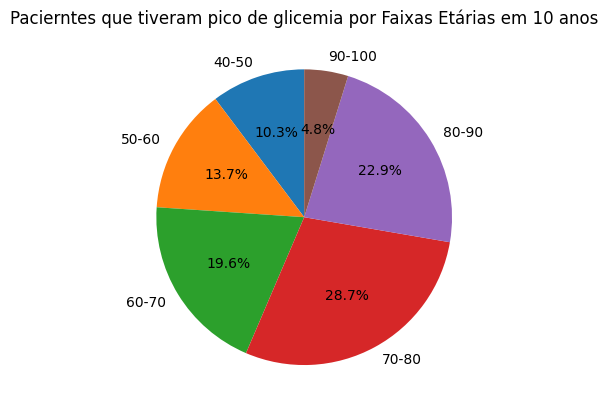

In [16]:
plt.pie(lista, labels=listaetaria, autopct='%1.1f%%', startangle=90)
plt.title('Pacierntes que tiveram pico de glicemia por Faixas Etárias em 10 anos')
plt.show()

In [4]:
import nbformat
from nbconvert import HTMLExporter

# Nome do arquivo de entrada e saída
notebook_filename = "dfhospitalreadmission.ipynb"
output_filename = "dfhospitalreadmission.html"

# Carregar o notebook
with open(notebook_filename) as f:
    notebook_content = nbformat.read(f, as_version=4)

# Converter para HTML
html_exporter = HTMLExporter()
body, _ = html_exporter.from_notebook_node(notebook_content)

# Salvar como HTML
with open(output_filename, "w", encoding="utf-8") as f:
    f.write(body)

print("Conversão concluída! Arquivo salvo como:", output_filename)

Conversão concluída! Arquivo salvo como: dfhospitalreadmission.html


In [5]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def imagem_para_pdf(imagens, output_pdf):
    c = canvas.Canvas(output_pdf, pagesize=letter)
    
    for imagem in imagens:
        c.drawImage(imagem, 50, 500, width=500, height=300)  # Ajuste conforme necessário
        c.showPage()  # Adiciona nova página para cada imagem
    
    c.save()

# Lista de imagens a serem convertidas
imagens = ["distribuicao_normal.png", "matplotlib.png", "mortespmeses.png", "plotlyNascimentosMes.png", "seabornBoxPlot.png", "seabornHeatmap.png", "seabornNascMes.png", "seabornPairplot.png", ]
imagem_para_pdf(imagens, "imagens_convertidas.pdf")
print("Imagens convertidas para PDF!")


Imagens convertidas para PDF!


In [6]:
from PyPDF2 import PdfMerger

# Lista de arquivos PDF a serem unidos
pdf_files = ["dfhospitalreadmission.pdf", "imagens_convertidas.pdf"]

# Criar um objeto PdfMerger
merger = PdfMerger()

# Adicionar cada PDF ao merger
for pdf in pdf_files:
    merger.append(pdf)

# Salvar o PDF final
merger.write("dfhospitalreadmission.pdf")
merger.close()

print("PDFs unidos com sucesso!")


PDFs unidos com sucesso!
